# Unit Simulation Experimental Notebook

In [1]:
from IPython.display import HTML
%matplotlib inline
# our simulator
import matplotlib.pyplot as plt
import battlesim as bsm

### Trial 1. 50 Clone Troopers vs. 80 B1 battledroids

Using Random AI selection for targets.

In [2]:
trial1 = bsm.Battle("datasets/starwars-clonewars.csv")
# define 100 battledroids, 50 clones
trial1.create_army([("b1 battledroid", 80), ("Clone Trooper", 20), ("Clone Trooper", 15)])
# battle droids near (0, 0), clones near (10, 10)
trial1.apply_position([
    dict(name="uniform", x_loc=-5., scale=2.),
    dict(name="gaussian", loc=0.),
    dict(name="gaussian", x_loc=4., y_loc=5.),
])
#init, rolling AIs now default to 'nearest'
trial1.set_decision_ai(["aggressive","hit_and_run","hit_and_run"])
# set boundary
trial1.set_bounds((-10., 20., -10., 20.))
# set terrain
trial1.apply_terrain("contour", res=.5)

C:\Users\Gregory\Documents\PublicCode\BattleSimulator\battlesim\_battle.py:66: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.zeros(n, dtype=[


bsm.Battle(init=True, n_armies=3, simulated=False)

In [3]:
# run a battle
F = trial1.simulate(max_step=1500)

C:\Users\Gregory\Documents\PublicCode\BattleSimulator\battlesim\_simulator_fast.py:109: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  frames = np.zeros(


In [4]:
F.memory_usage()

Index         98440
army          12305
allegiance    12305
alive         12305
hp            49220
armor         49220
x             49220
y             49220
dir_x         49220
dir_y         49220
dtype: int64

In [5]:
F.memory_usage().sum()/1000000

0.430675

In [6]:
trial1.sim_jupyter()

### Terrain tweaking

In [2]:
t = bsm.Terrain((0, 100, 0, 100), res=0.5, form="contour")

In [3]:
import numpy as np
from numba import njit

In [20]:
noise = np.random.rand(100, 100)

In [21]:
@njit
def smooth_noise(x, y, noisewidth=100, noiseheight=100):
    # get fractional part
    fractX = x - int(x)
    fractY = y - int(y)
    # wrap
    x1 = (int(x) + noisewidth) % noisewidth
    y1 = (int(y) + noiseheight) % noiseheight
    # neighbor values
    x2 = (x1 + noisewidth - 1) % noisewidth
    y2 = (y1 + noiseheight - 1) % noiseheight
    # smooth the noise with bilinear interpolation
    val = 0.
    val += fractX*fractY*noise[y1, x1]
    val += (1-fractX)*fractY*noise[y1, x2]
    val += fractX*(1-fractY)*noise[y2,x1]
    val += (1-fractX)*(1-fractY)*noise[y2,x2]
    return val

@njit
def turbulence(x, y, size):
    val = 0.
    init_size = size
    while size >= 1:
        val += smooth_noise(x / size, y / size) * size
        size /= 2.
    return 128 * val / init_size

In [22]:
def create_turbulence_map(dim_x, dim_y):
    for x in range(dim_x):
        for y in range(dim_y):
            noise[x, y] = turbulence(x, y, 40)
    return noise

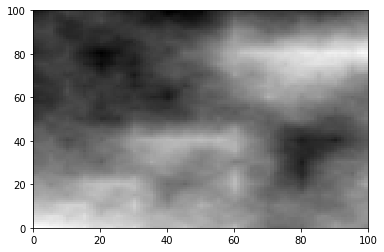

In [23]:
plt.pcolormesh(create_turbulence_map(100, 100), cmap="gray")

In [24]:
X, Y = np.mgrid[0:10:.1, 0:10:.1]

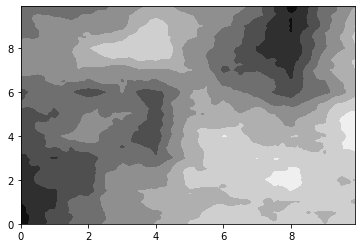

In [26]:
plt.contourf(X, Y, create_turbulence_map(100, 100), cmap="gray_r")